In [ ]:
import os
import shutil
from collections import OrderedDict

import json
import matplotlib.pyplot as plt
import nibabel as nib

import torch
import numpy as np
import pandas as pd
from scipy import stats


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

drive_dir = "/content/drive/MyDrive"
mount_dir = os.path.join(drive_dir, "Colab Notebooks")
base_dir = os.getcwd()

Mounted at /content/drive


In [ ]:
def dice(gt_mask, pred_mask):
  intersect = np.sum(gt_mask * pred_mask)
  total_sum = np.sum(gt_mask) + np.sum(pred_mask)
  score = 2 * intersect/total_sum
  dice_score = np.round(score, 3)
  return dice_score

In [ ]:
gt_dir_2ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Fine Tuning Post Proc 2Ch/nnUNet_raw/Dataset227_Heart2Ch/labelsT2Ch"
pred_dir_2ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Fine Tuning Post Proc 2Ch/nnUNet_results/Dataset227_Heart2Ch/predTs"

gt_files_2ch = sorted([f for f in os.listdir(gt_dir_2ch) if f.endswith(".nii.gz")])
pred_files_2ch = sorted([f for f in os.listdir(pred_dir_2ch) if f.endswith(".nii.gz")])

dice_lvbp = {}
dice_lvm = {}
dice_la = {}

dice_lvbp_list = []
dice_lvm_list = []
dice_la_list = []

for gt_file, pred_file in zip(gt_files_2ch, pred_files_2ch):
  gt_path = os.path.join(gt_dir_2ch, gt_file)
  pred_path = os.path.join(pred_dir_2ch, pred_file)

  gt_seg = nib.load(gt_path).get_fdata()
  #print(gt_seg.shape)
  pred_seg = nib.load(pred_path).get_fdata()
  #print(pred_seg.shape)

  score_lvbp = []
  score_lvm = []
  score_la = []

  for i in range(25):
    gt_lvbp = gt_seg[:, :, i].copy()
    gt_lvbp[gt_lvbp != 1] = 0
    pred_lvbp = pred_seg[:, :, i].copy()
    pred_lvbp[pred_lvbp != 1] = 0
    score_lvbp.append(dice(gt_lvbp, pred_lvbp))

    gt_lvm = gt_seg[:, :, i].copy()
    gt_lvm[gt_lvm != 2] = 0
    gt_lvm[gt_lvm == 2] = 1
    #print(gt_lvm.shape)
    pred_lvm = pred_seg[:, :, i].copy()
    pred_lvm[pred_lvm != 2] = 0
    pred_lvm[pred_lvm == 2] = 1
    #print(pred_lvm.shape)
    score_lvm.append(dice(gt_lvm, pred_lvm))

    gt_la = gt_seg[:, :, i].copy()
    gt_la[gt_la != 3] = 0
    gt_la[gt_la == 3] = 1
    pred_la = pred_seg[:, :, i].copy()
    pred_la[pred_la != 3] = 0
    pred_la[pred_la == 3] = 1
    score_la.append(dice(gt_la, pred_la))

  dc_lvbp = round(np.mean(score_lvbp), 4)
  dc_lvm = round(np.mean(score_lvm), 4)
  dc_la = round(np.mean(score_la), 4)

  dice_lvbp[gt_file] = dc_lvbp
  dice_lvm[gt_file] = dc_lvm
  dice_la[gt_file] = dc_la

  dice_lvbp_list.append(dc_lvbp)
  dice_lvm_list.append(dc_lvm)
  dice_la_list.append(dc_la)

  print(gt_file)
  print(f"LVBP: {dc_lvbp}, LV Myo: {dc_lvm}, LA: {dc_la}")




KeyboardInterrupt: 

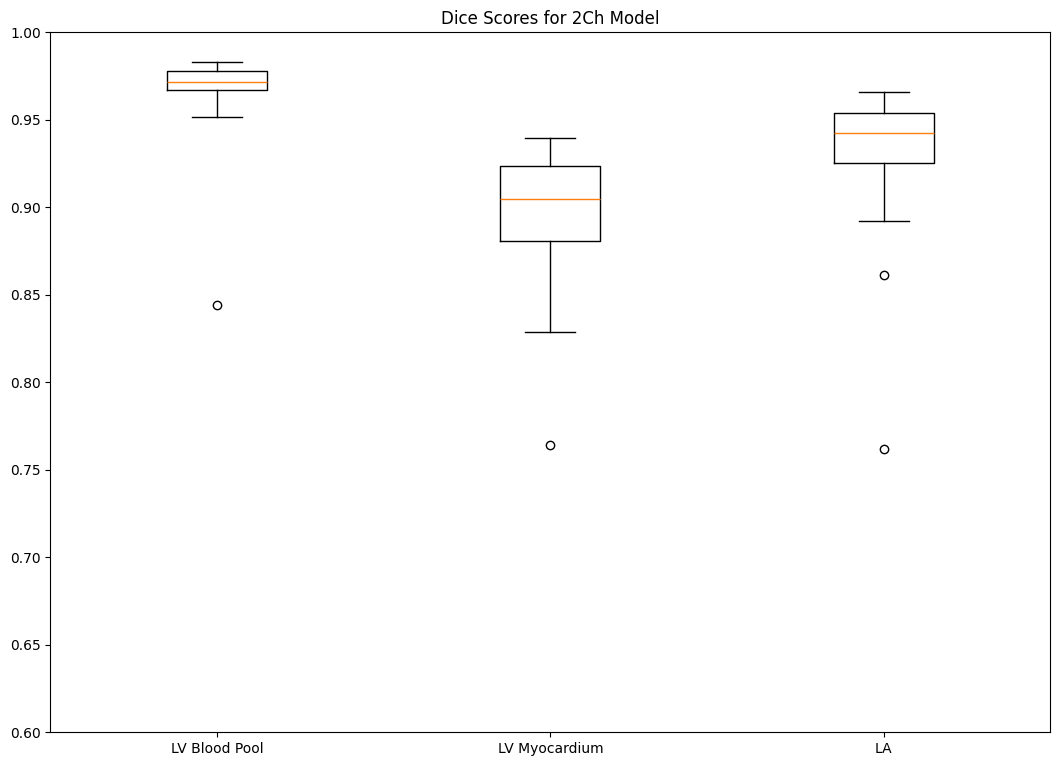

In [ ]:
#d_1 = [0.9722, 0.9706, 0.894, 0.9844, 0.9722, 0.9786, 0.9582, 0.9754, 0.9836, 0.9718, 0.9778]#dice_lvbp_list
#d_2 = [0.9068, 0.8891, 0.775, 0.9389, 0.8902, 0.931, 0.9012, 0.9322, 0.899, 0.9099, 0.9237]#dice_lvm_list
#d_3 = [0.9288, 0.9335, 0.8894, 0.9464, 0.9236, 0.9556, 0.9561, 0.9656, 0.9668, 0.9431, 0.9568]#dice_la_list

d_1 = dice_lvbp_list
d_2 = dice_lvm_list
d_3 = dice_la_list

labels = ["LV Blood Pool", "LV Myocardium", "LA"]

data = [d_1, d_2, d_3]
fig  = plt.figure(figsize = (10, 7))
ax = fig.add_axes([0, 0, 1, 1])
boxp = plt.boxplot(data)
plt.xticks(np.arange(len(labels)) + 1, labels)
plt.ylim(0.6, 1.0)
#plt.yticks(np.arange(5), [0.6, 0.7, 0.8, 0.9, 1.0])
plt.title("Dice Scores for 2Ch Model")
plt.show()

In [ ]:
gt_dir_2ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Analyses/labels/labelsT2Ch - Age/51-60"
pred_dir_2ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Analyses/preds/predsT2Ch - Age/51 - 60"

gt_files_2ch = sorted([f for f in os.listdir(gt_dir_2ch) if f.endswith(".nii.gz")])
pred_files_2ch = sorted([f for f in os.listdir(pred_dir_2ch) if f.endswith(".nii.gz")])

dice_lvbp_hw = {}
dice_lvm_hw = {}
dice_la_hw = {}

dice_lvbp_list_hw = []
dice_lvm_list_hw = []
dice_la_list_hw = []

for gt_file, pred_file in zip(gt_files_2ch, pred_files_2ch):
  gt_path = os.path.join(gt_dir_2ch, gt_file)
  pred_path = os.path.join(pred_dir_2ch, pred_file)

  gt_seg = nib.load(gt_path).get_fdata()
  pred_seg = nib.load(pred_path).get_fdata()

  score_lvbp = []
  score_lvm = []
  score_la = []

  for i in range(25):
    gt_lvbp = gt_seg[:, :, i].copy()
    gt_lvbp[gt_lvbp != 1] = 0
    pred_lvbp = pred_seg[:, :, i].copy()
    pred_lvbp[pred_lvbp != 1] = 0
    score_lvbp.append(dice(gt_lvbp, pred_lvbp))

    gt_lvm = gt_seg[:, :, i].copy()
    gt_lvm[gt_lvm != 2] = 0
    gt_lvm[gt_lvm == 2] = 1
    #print(gt_lvm.shape)
    pred_lvm = pred_seg[:, :, i].copy()
    pred_lvm[pred_lvm != 2] = 0
    pred_lvm[pred_lvm == 2] = 1
    #print(pred_lvm.shape)
    score_lvm.append(dice(gt_lvm, pred_lvm))

    gt_la = gt_seg[:, :, i].copy()
    gt_la[gt_la != 3] = 0
    gt_la[gt_la == 3] = 1
    pred_la = pred_seg[:, :, i].copy()
    pred_la[pred_la != 3] = 0
    pred_la[pred_la == 3] = 1
    score_la.append(dice(gt_la, pred_la))

  dc_lvbp = round(np.mean(score_lvbp), 4)
  dc_lvm = round(np.mean(score_lvm), 4)
  dc_la = round(np.mean(score_la), 4)

  dice_lvbp_hw[gt_file] = dc_lvbp
  dice_lvm_hw[gt_file] = dc_lvm
  dice_la_hw[gt_file] = dc_la

  dice_lvbp_list_hw.append(dc_lvbp)
  dice_lvm_list_hw.append(dc_lvm)
  dice_la_list_hw.append(dc_la)

  print(gt_file)
  print(f"LVBP: {dc_lvbp}, LV Myo: {dc_lvm}, LA: {dc_la}")

TW-131.nii.gz
LVBP: 0.97, LV Myo: 0.9049, LA: 0.9548
TW-132.nii.gz
LVBP: 0.9764, LV Myo: 0.9, LA: 0.9463
TW-141.nii.gz
LVBP: 0.9807, LV Myo: 0.9176, LA: 0.8615
TW-142.nii.gz
LVBP: 0.9682, LV Myo: 0.8286, LA: 0.9099
TW-20.nii.gz
LVBP: 0.9566, LV Myo: 0.875, LA: 0.9268
TW-21.nii.gz
LVBP: 0.9605, LV Myo: 0.8924, LA: 0.955


In [ ]:
gt_dir_2ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Analyses/labels/labelsT2Ch - Age/61-70"
pred_dir_2ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Analyses/preds/predsT2Ch - Age/61 - 70"

gt_files_2ch = sorted([f for f in os.listdir(gt_dir_2ch) if f.endswith(".nii.gz")])
pred_files_2ch = sorted([f for f in os.listdir(pred_dir_2ch) if f.endswith(".nii.gz")])

dice_lvbp_ow = {}
dice_lvm_ow = {}
dice_la_ow = {}

dice_lvbp_list_ow = []
dice_lvm_list_ow = []
dice_la_list_ow = []

for gt_file, pred_file in zip(gt_files_2ch, pred_files_2ch):
  gt_path = os.path.join(gt_dir_2ch, gt_file)
  pred_path = os.path.join(pred_dir_2ch, pred_file)

  gt_seg = nib.load(gt_path).get_fdata()
  print(gt_seg.shape)
  pred_seg = nib.load(pred_path).get_fdata()

  score_lvbp = []
  score_lvm = []
  score_la = []

  for i in range(25):
    gt_lvbp = gt_seg[:, :, i].copy()
    gt_lvbp[gt_lvbp != 1] = 0
    pred_lvbp = pred_seg[:, :, i].copy()
    pred_lvbp[pred_lvbp != 1] = 0
    score_lvbp.append(dice(gt_lvbp, pred_lvbp))

    gt_lvm = gt_seg[:, :, i].copy()
    gt_lvm[gt_lvm != 2] = 0
    gt_lvm[gt_lvm == 2] = 1
    #print(gt_lvm.shape)
    pred_lvm = pred_seg[:, :, i].copy()
    pred_lvm[pred_lvm != 2] = 0
    pred_lvm[pred_lvm == 2] = 1
    #print(pred_lvm.shape)
    score_lvm.append(dice(gt_lvm, pred_lvm))

    gt_la = gt_seg[:, :, i].copy()
    gt_la[gt_la != 3] = 0
    gt_la[gt_la == 3] = 1
    pred_la = pred_seg[:, :, i].copy()
    pred_la[pred_la != 3] = 0
    pred_la[pred_la == 3] = 1
    score_la.append(dice(gt_la, pred_la))

  dc_lvbp = round(np.mean(score_lvbp), 4)
  dc_lvm = round(np.mean(score_lvm), 4)
  dc_la = round(np.mean(score_la), 4)

  dice_lvbp_ow[gt_file] = dc_lvbp
  dice_lvm_ow[gt_file] = dc_lvm
  dice_la_ow[gt_file] = dc_la

  dice_lvbp_list_ow.append(dc_lvbp)
  dice_lvm_list_ow.append(dc_lvm)
  dice_la_list_ow.append(dc_la)

  print(gt_file)
  print(f"LVBP: {dc_lvbp}, LV Myo: {dc_lvm}, LA: {dc_la}")

(192, 154, 25)
TW-110.nii.gz
LVBP: 0.9733, LV Myo: 0.92, LA: 0.9502
(192, 154, 25)
TW-42.nii.gz
LVBP: 0.9701, LV Myo: 0.9019, LA: 0.9295
(192, 154, 25)
TW-43.nii.gz
LVBP: 0.9663, LV Myo: 0.8588, LA: 0.8935
(192, 154, 25)
TW-46.nii.gz
LVBP: 0.9699, LV Myo: 0.8572, LA: 0.9609
(192, 154, 25)
TW-47.nii.gz
LVBP: 0.9757, LV Myo: 0.9219, LA: 0.9418
(192, 154, 25)
TW-58.nii.gz
LVBP: 0.9631, LV Myo: 0.8966, LA: 0.9398
(192, 154, 25)
TW-59.nii.gz
LVBP: 0.9813, LV Myo: 0.9373, LA: 0.9424
(192, 154, 25)
TW-91.nii.gz
LVBP: 0.8444, LV Myo: 0.7642, LA: 0.7616
(192, 154, 25)
TW-92.nii.gz
LVBP: 0.9714, LV Myo: 0.887, LA: 0.9236
(192, 154, 25)
TW-94.nii.gz
LVBP: 0.9734, LV Myo: 0.8537, LA: 0.9578


In [ ]:
gt_dir_2ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Analyses/labels/labelsT2Ch - Age/71-80"
pred_dir_2ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Analyses/preds/predsT2Ch - Age/71 - 80"

gt_files_2ch = sorted([f for f in os.listdir(gt_dir_2ch) if f.endswith(".nii.gz")])
pred_files_2ch = sorted([f for f in os.listdir(pred_dir_2ch) if f.endswith(".nii.gz")])

dice_lvbp_ob = {}
dice_lvm_ob = {}
dice_la_ob = {}

dice_lvbp_list_ob = []
dice_lvm_list_ob = []
dice_la_list_ob = []

for gt_file, pred_file in zip(gt_files_2ch, pred_files_2ch):
  gt_path = os.path.join(gt_dir_2ch, gt_file)
  pred_path = os.path.join(pred_dir_2ch, pred_file)

  gt_seg = nib.load(gt_path).get_fdata()
  pred_seg = nib.load(pred_path).get_fdata()

  score_lvbp = []
  score_lvm = []
  score_la = []

  for i in range(25):
    gt_lvbp = gt_seg[:, :, i].copy()
    gt_lvbp[gt_lvbp != 1] = 0
    pred_lvbp = pred_seg[:, :, i].copy()
    pred_lvbp[pred_lvbp != 1] = 0
    score_lvbp.append(dice(gt_lvbp, pred_lvbp))

    gt_lvm = gt_seg[:, :, i].copy()
    gt_lvm[gt_lvm != 2] = 0
    gt_lvm[gt_lvm == 2] = 1
    #print(gt_lvm.shape)
    pred_lvm = pred_seg[:, :, i].copy()
    pred_lvm[pred_lvm != 2] = 0
    pred_lvm[pred_lvm == 2] = 1
    #print(pred_lvm.shape)
    score_lvm.append(dice(gt_lvm, pred_lvm))

    gt_la = gt_seg[:, :, i].copy()
    gt_la[gt_la != 3] = 0
    gt_la[gt_la == 3] = 1
    pred_la = pred_seg[:, :, i].copy()
    pred_la[pred_la != 3] = 0
    pred_la[pred_la == 3] = 1
    score_la.append(dice(gt_la, pred_la))

  dc_lvbp = round(np.mean(score_lvbp), 4)
  dc_lvm = round(np.mean(score_lvm), 4)
  dc_la = round(np.mean(score_la), 4)

  dice_lvbp_ob[gt_file] = dc_lvbp
  dice_lvm_ob[gt_file] = dc_lvm
  dice_la_ob[gt_file] = dc_la

  dice_lvbp_list_ob.append(dc_lvbp)
  dice_lvm_list_ob.append(dc_lvm)
  dice_la_list_ob.append(dc_la)

  print(gt_file)
  print(f"LVBP: {dc_lvbp}, LV Myo: {dc_lvm}, LA: {dc_la}")

TW-145.nii.gz
LVBP: 0.9767, LV Myo: 0.9252, LA: 0.9269
TW-154.nii.gz
LVBP: 0.9684, LV Myo: 0.9091, LA: 0.9361
TW-155.nii.gz
LVBP: 0.9516, LV Myo: 0.8458, LA: 0.8921
TW-164.nii.gz
LVBP: 0.9793, LV Myo: 0.9274, LA: 0.9442
TW-165.nii.gz
LVBP: 0.9795, LV Myo: 0.9057, LA: 0.9242
TW-223.nii.gz
LVBP: 0.9792, LV Myo: 0.9395, LA: 0.9529
TW-37.nii.gz
LVBP: 0.9599, LV Myo: 0.9027, LA: 0.9499
TW-38.nii.gz
LVBP: 0.9709, LV Myo: 0.9343, LA: 0.9649
TW-97.nii.gz
LVBP: 0.9767, LV Myo: 0.9309, LA: 0.945
TW-98.nii.gz
LVBP: 0.9802, LV Myo: 0.9366, LA: 0.9566


In [ ]:
!pip install scikit-posthocs

In [ ]:
import scikit_posthocs as sp

In [ ]:
group1 = dice_lvm_list_hw
group2 = dice_lvm_list_ow
group3 = dice_lvm_list_ob

kw = stats.kruskal(group1, group2, group3, nan_policy = "omit")
print(kw)

KruskalResult(statistic=np.float64(6.441025641025647), pvalue=np.float64(0.0399345737400769))


In [ ]:
groups = group1 + group2 + group3
categories = []

for i in group1:
  categories.append("51-60")

for i in group2:
  categories.append("61-70")

for i in group3:
  categories.append("71-80")

print(groups)
print(categories)


df = pd.DataFrame({"Dice Scores": groups,
                   "Age Group": categories})

print(df)




[np.float64(0.9049), np.float64(0.9), np.float64(0.9176), np.float64(0.8286), np.float64(0.875), np.float64(0.8924), np.float64(0.92), np.float64(0.9019), np.float64(0.8588), np.float64(0.8572), np.float64(0.9219), np.float64(0.8966), np.float64(0.9373), np.float64(0.7642), np.float64(0.887), np.float64(0.8537), np.float64(0.9252), np.float64(0.9091), np.float64(0.8458), np.float64(0.9274), np.float64(0.9057), np.float64(0.9395), np.float64(0.9027), np.float64(0.9343), np.float64(0.9309), np.float64(0.9366)]
['51-60', '51-60', '51-60', '51-60', '51-60', '51-60', '61-70', '61-70', '61-70', '61-70', '61-70', '61-70', '61-70', '61-70', '61-70', '61-70', '71-80', '71-80', '71-80', '71-80', '71-80', '71-80', '71-80', '71-80', '71-80', '71-80']
    Dice Scores Age Group
0        0.9049     51-60
1        0.9000     51-60
2        0.9176     51-60
3        0.8286     51-60
4        0.8750     51-60
5        0.8924     51-60
6        0.9200     61-70
7        0.9019     61-70
8        0.8588  

In [ ]:
groups = [g.dropna().to_numpy() for _, g in df.groupby("Age Group")["Dice Scores"]]

kw_pd = stats.kruskal(*groups, nan_policy="omit")

print(kw_pd)

KruskalResult(statistic=np.float64(6.441025641025647), pvalue=np.float64(0.0399345737400769))


In [ ]:
h = kw.statistic
k = 3
n = 26

epsilon_sq = (h - k + 1)/(n - k)
eta_sq = h/(n - 1)

print(f"H={h:.3f}, df = {k-1}, p={kw.pvalue:.4g}, epsilon^2={epsilon_sq:.3f}, eta_sq={eta_sq:.3f}")

H=6.441, df = 2, p=0.03993, epsilon^2=0.193, eta_sq=0.258


In [ ]:
conf_matrix = sp.posthoc_dunn(df, val_col = "Dice Scores", group_col = "Age Group", p_adjust = "holm")
print(conf_matrix)

dunn_fdh = sp.posthoc_dunn(df, val_col = "Dice Scores", group_col = "Age Group", p_adjust = "fdr_bh")
print(dunn_fdh)


          51-60     61-70     71-80
51-60  1.000000  0.839488  0.084999
61-70  0.839488  1.000000  0.084999
71-80  0.084999  0.084999  1.000000
          51-60     61-70     71-80
51-60  1.000000  0.839488  0.053404
61-70  0.839488  1.000000  0.053404
71-80  0.053404  0.053404  1.000000


In [ ]:
d_1 = dice_lvbp_list_hw
d_2 = dice_lvbp_list_ow
d_3 = dice_lvbp_list_ob
d_4 = dice_lvm_list_hw
d_5 = dice_lvm_list_ow
d_6 = dice_lvm_list_ob
d_7 = dice_la_list_hw
d_8 = dice_la_list_ow
d_9 = dice_la_list_ob


# labels = ["LV Blood Pool", "LV Myocardium", "RVBP", "LA", "RA"]

# data = [d_1, d_2, d_3, d_4, d_5, d_6, d_7, d_8, d_9, d_10, d_11, d_12, d_13, d_14, d_15]
# fig  = plt.figure(figsize = (10, 7))
# ax = fig.add_axes([0, 0, 1, 1])
# boxp = plt.boxplot(data)
# plt.xticks([2, 5, 8, 11, 14], labels)
# plt.ylim(0.6, 1.0)
# #plt.yticks(np.arange(5), [0.6, 0.7, 0.8, 0.9, 1.0])
# plt.title("Dice Scores for 4Ch Model Age")
# plt.show()

dice_pd = []

groups_x = ["LVBP", "LV Myo", "LA"]
groups_y = ["51-60", "61-70", "71-80"]
counter = 0

for group in groups_y:
  counter += 1
  if counter == 1:
    for n in range(0, len(d_1)):
      dice_pd.append({
        "Age": group,
        "LVBP": d_1[n],
        "LV Myo": d_4[n],
        "LA": d_7[n]
      })
  elif counter == 2:
    for n in range(0, len(d_2)):
      dice_pd.append({
        "Age": group,
        "LVBP": d_2[n],
        "LV Myo": d_5[n],
        "LA": d_8[n]
      })
  elif counter == 3:
    for n in range(0, len(d_3)):
      dice_pd.append({
        "Age": group,
        "LVBP": d_3[n],
        "LV Myo": d_6[n],
        "LA": d_9[n]
      })

df = pd.DataFrame(dice_pd)
print(df)

      Age    LVBP  LV Myo      LA
0   51-60  0.9700  0.9049  0.9548
1   51-60  0.9764  0.9000  0.9463
2   51-60  0.9807  0.9176  0.8615
3   51-60  0.9682  0.8286  0.9099
4   51-60  0.9566  0.8750  0.9268
5   51-60  0.9605  0.8924  0.9550
6   61-70  0.9733  0.9200  0.9502
7   61-70  0.9701  0.9019  0.9295
8   61-70  0.9663  0.8588  0.8935
9   61-70  0.9699  0.8572  0.9609
10  61-70  0.9757  0.9219  0.9418
11  61-70  0.9631  0.8966  0.9398
12  61-70  0.9813  0.9373  0.9424
13  61-70  0.8444  0.7642  0.7616
14  61-70  0.9714  0.8870  0.9236
15  61-70  0.9734  0.8537  0.9578
16  71-80  0.9767  0.9252  0.9269
17  71-80  0.9684  0.9091  0.9361
18  71-80  0.9516  0.8458  0.8921
19  71-80  0.9793  0.9274  0.9442
20  71-80  0.9795  0.9057  0.9242
21  71-80  0.9792  0.9395  0.9529
22  71-80  0.9599  0.9027  0.9499
23  71-80  0.9709  0.9343  0.9649
24  71-80  0.9767  0.9309  0.9450
25  71-80  0.9802  0.9366  0.9566


<function matplotlib.pyplot.show(close=None, block=None)>

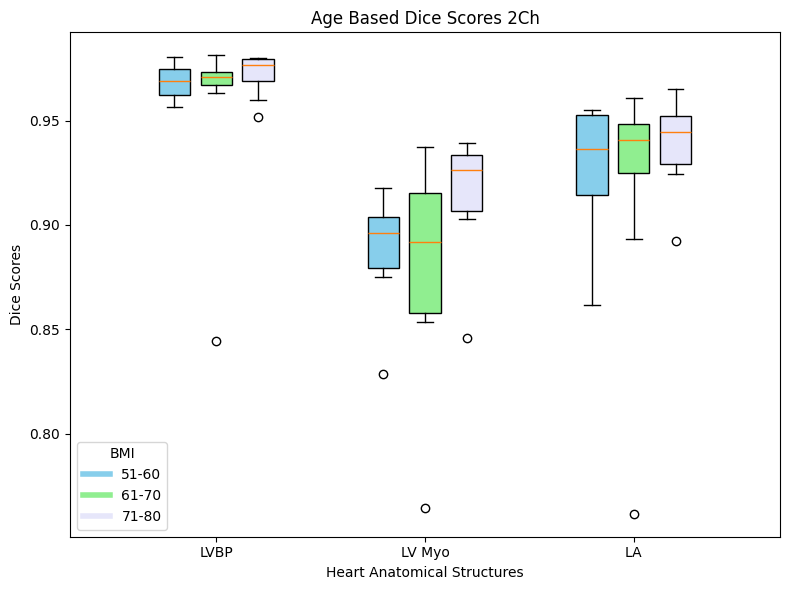

In [ ]:
locations = []
bp_data = []

group_width = 0.2

for i, group_x in enumerate(groups_x):
  for j, group_y in enumerate(groups_y):
    locations.append(i + j * group_width)
    bp_data.append(df.loc[df["Age"] == group_y, group_x])


colours = ["skyblue", "lightgreen", "lavender"]

fig, grid = plt.subplots(figsize=(8,6))
boxplt = grid.boxplot(bp_data, positions=locations, widths = 0.15, patch_artist=True)

for i, patch in enumerate(boxplt["boxes"]):
  patch.set_facecolor(colours[i % len(groups_y)])

grid.set_xticks([i + group_width for i in range(len(groups_x))])
grid.set_xticklabels(groups_x)
grid.set_xlabel("Heart Anatomical Structures")
grid.set_ylabel("Dice Scores")
grid.set_title("Age Based Dice Scores 2Ch")

legends = [plt.Line2D([0], [0], color=colour, lw=4) for colour in colours]
grid.legend(legends, groups_y, title="BMI")

plt.tight_layout()
plt.show

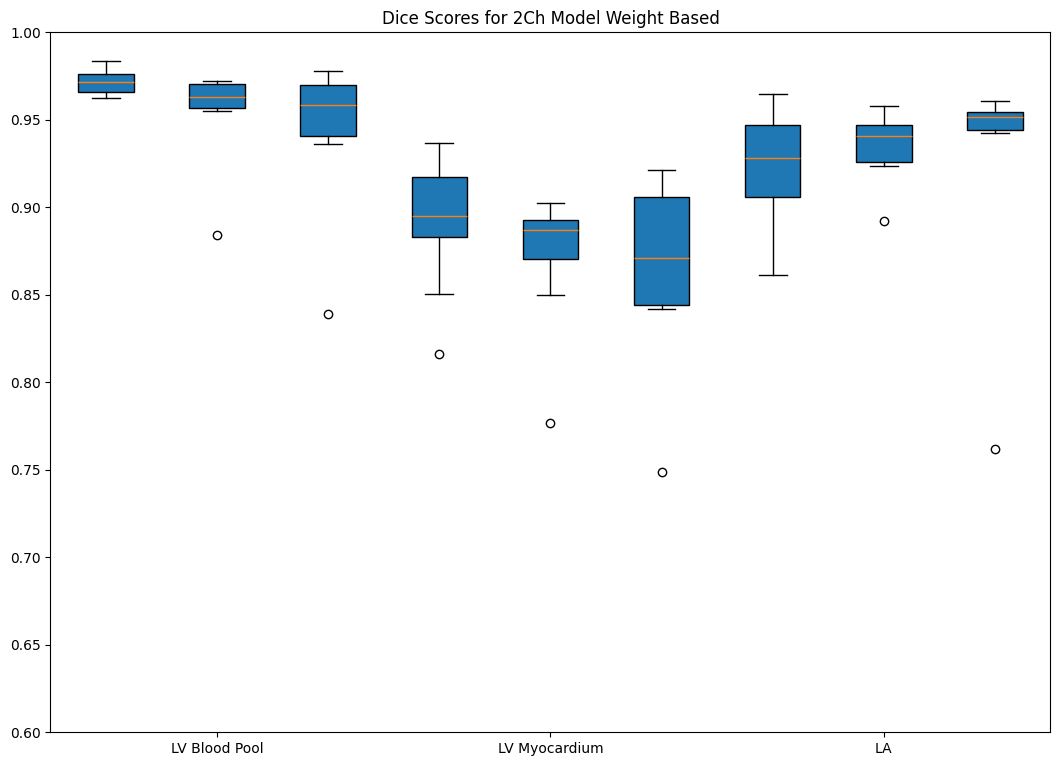

In [ ]:
d_1 = dice_lvbp_list_hw
d_2 = dice_lvbp_list_ow
d_3 = dice_lvbp_list_ob
d_4 = dice_lvm_list_hw
d_5 = dice_lvm_list_ow
d_6 = dice_lvm_list_ob
d_7 = dice_la_list_hw
d_8 = dice_la_list_ow
d_9 = dice_la_list_ob

labels = ["LV Blood Pool", "LV Myocardium", "LA"]

data = [d_1, d_2, d_3, d_4, d_5, d_6, d_7, d_8, d_9]
fig  = plt.figure(figsize = (10, 7))
ax = fig.add_axes([0, 0, 1, 1])
boxp = plt.boxplot(data, patch_artist = True)
plt.xticks([2, 5, 8], labels)
plt.ylim(0.6, 1.0)
#plt.yticks(np.arange(5), [0.6, 0.7, 0.8, 0.9, 1.0])
plt.title("Dice Scores for 2Ch Model Weight Based")
plt.show()

In [ ]:
gt_dir_4ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Fine Tuning Post Proc 4Ch/nnUNet_raw/Dataset228_Heart4Ch/labelsT4Ch"
pred_dir_4ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Fine Tuning Post Proc 4Ch/nnUNet_results/Dataset228_Heart4Ch/predTs"

gt_files_4ch = sorted([f for f in os.listdir(gt_dir_4ch) if f.endswith(".nii.gz")])
pred_files_4ch = sorted([f for f in os.listdir(pred_dir_4ch) if f.endswith(".nii.gz")])

dice_lvbp = {}
dice_lvm = {}
dice_rvbp = {}
dice_la = {}
dice_ra = {}

dice_lvbp_list = []
dice_lvm_list = []
dice_rvbp_list = []
dice_la_list = []
dice_ra_list = []

for gt_file, pred_file in zip(gt_files_4ch, pred_files_4ch):
  gt_path = os.path.join(gt_dir_4ch, gt_file)
  pred_path = os.path.join(pred_dir_4ch, pred_file)

  gt_seg = nib.load(gt_path).get_fdata()
  pred_seg = nib.load(pred_path).get_fdata()

  score_lvbp = []
  score_lvm = []
  score_rvbp = []
  score_la = []
  score_ra = []

  for i in range(25):
    gt_lvbp = gt_seg[:, :, i].copy()
    gt_lvbp[gt_lvbp != 1] = 0
    pred_lvbp = pred_seg[:, :, i].copy()
    pred_lvbp[pred_lvbp != 1] = 0
    score_lvbp.append(dice(gt_lvbp, pred_lvbp))

    gt_lvm = gt_seg[:, :, i].copy()
    gt_lvm[gt_lvm != 2] = 0
    gt_lvm[gt_lvm == 2] = 1
    #print(gt_lvm.shape)
    pred_lvm = pred_seg[:, :, i].copy()
    pred_lvm[pred_lvm != 2] = 0
    pred_lvm[pred_lvm == 2] = 1
    #print(pred_lvm.shape)
    score_lvm.append(dice(gt_lvm, pred_lvm))

    gt_rvbp = gt_seg[:, :, i].copy()
    gt_rvbp[gt_rvbp != 3] = 0
    gt_rvbp[gt_rvbp == 3] = 1
    pred_rvbp = pred_seg[:, :, i].copy()
    pred_rvbp[pred_rvbp != 3] = 0
    pred_rvbp[pred_rvbp == 3] = 1
    score_rvbp.append(dice(gt_rvbp, pred_rvbp))

    gt_la = gt_seg[:, :, i].copy()
    gt_la[gt_la != 4] = 0
    gt_la[gt_la == 4] = 1
    pred_la = pred_seg[:, :, i].copy()
    pred_la[pred_la != 4] = 0
    pred_la[pred_la == 4] = 1
    score_la.append(dice(gt_la, pred_la))

    gt_ra = gt_seg[:, :, i].copy()
    gt_ra[gt_ra != 5] = 0
    gt_ra[gt_ra == 5] = 1
    pred_ra = pred_seg[:, :, i].copy()
    pred_ra[pred_ra != 5] = 0
    pred_ra[pred_ra == 5] = 1
    score_ra.append(dice(gt_ra, pred_ra))

  dc_lvbp = round(np.mean(score_lvbp), 4)
  dc_lvm = round(np.mean(score_lvm), 4)
  dc_rvbp = round(np.mean(score_rvbp), 4)
  dc_la = round(np.mean(score_la), 4)
  dc_ra = round(np.mean(score_ra), 4)

  dice_lvbp[gt_file] = dc_lvbp
  dice_lvm[gt_file] = dc_lvm
  dice_rvbp[gt_file] = dc_rvbp
  dice_la[gt_file] = dc_la
  dice_ra[gt_file] = dc_ra

  dice_lvbp_list.append(dc_lvbp)
  dice_lvm_list.append(dc_lvm)
  dice_rvbp_list.append(dc_rvbp)
  dice_la_list.append(dc_la)
  dice_ra_list.append(dc_ra)

  print(gt_file)
  print(f"LVBP: {dc_lvbp}, LV Myo: {dc_lvm}, RVBP: {dc_rvbp}, LA: {dc_la}, RA: {dc_ra}")

TW-110.nii.gz
LVBP: 0.9782, LV Myo: 0.9493, RVBP: 0.976, LA: 0.9662, RA: 0.9708
TW-131.nii.gz
LVBP: 0.9836, LV Myo: 0.9528, RVBP: 0.9783, LA: 0.947, RA: 0.9662
TW-132.nii.gz
LVBP: 0.983, LV Myo: 0.9464, RVBP: 0.983, LA: 0.9674, RA: 0.9438
TW-141.nii.gz
LVBP: 0.9772, LV Myo: 0.926, RVBP: 0.9866, LA: 0.8663, RA: 0.9335
TW-142.nii.gz
LVBP: 0.9836, LV Myo: 0.9529, RVBP: 0.9846, LA: 0.9466, RA: 0.9664
TW-145.nii.gz
LVBP: 0.9853, LV Myo: 0.9511, RVBP: 0.9739, LA: 0.9629, RA: 0.9609
TW-154.nii.gz
LVBP: 0.984, LV Myo: 0.9554, RVBP: 0.9758, LA: 0.9709, RA: 0.9264
TW-155.nii.gz
LVBP: 0.9822, LV Myo: 0.9518, RVBP: 0.9792, LA: 0.9633, RA: 0.8869
TW-164.nii.gz
LVBP: 0.9851, LV Myo: 0.9544, RVBP: 0.9837, LA: 0.9682, RA: 0.972
TW-165.nii.gz
LVBP: 0.9826, LV Myo: 0.943, RVBP: 0.9766, LA: 0.967, RA: 0.951
TW-20.nii.gz
LVBP: 0.9775, LV Myo: 0.942, RVBP: 0.9746, LA: 0.9332, RA: 0.9404
TW-21.nii.gz
LVBP: 0.983, LV Myo: 0.946, RVBP: 0.9638, LA: 0.9566, RA: 0.9149
TW-223.nii.gz
LVBP: 0.9789, LV Myo: 0.9462,

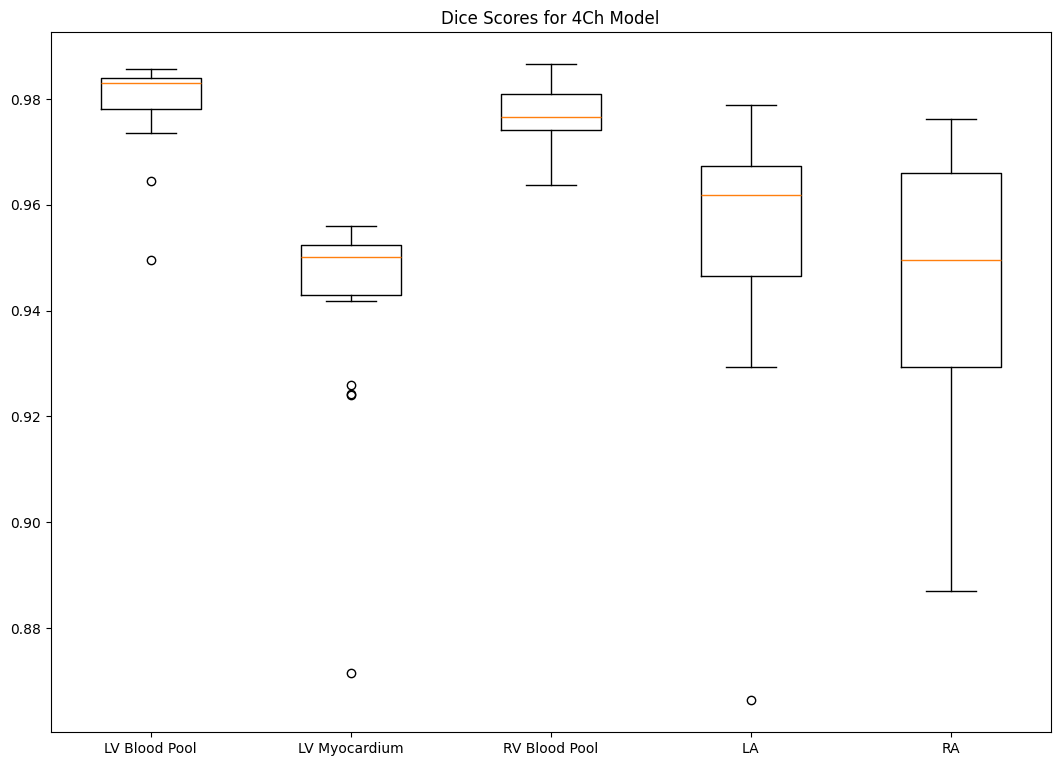

In [ ]:
d_1 = dice_lvbp_list
d_2 = dice_lvm_list
d_3 = dice_rvbp_list
d_4 = dice_la_list
d_5 = dice_ra_list

labels = ["LV Blood Pool", "LV Myocardium", "RV Blood Pool", "LA", "RA"]

data = [d_1, d_2, d_3, d_4, d_5]
fig  = plt.figure(figsize = (10, 7))
ax = fig.add_axes([0, 0, 1, 1])
boxp = plt.boxplot(data)
plt.xticks(np.arange(len(labels)) + 1, labels)
plt.title("Dice Scores for 4Ch Model")
plt.show()

In [ ]:
gt_dir_4ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Analyses/labels/labelsT4Ch - Age/51 - 60"
pred_dir_4ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Analyses/preds/predsT4Ch - Age/51 - 60"

gt_files_4ch = sorted([f for f in os.listdir(gt_dir_4ch) if f.endswith(".nii.gz")])
pred_files_4ch = sorted([f for f in os.listdir(pred_dir_4ch) if f.endswith(".nii.gz")])

dice_lvbp_hw = {}
dice_lvm_hw = {}
dice_rvbp_hw = {}
dice_la_hw = {}
dice_ra_hw = {}

dice_pd = []

dice_lvbp_list_hw = []
dice_lvm_list_hw = []
dice_rvbp_list_hw = []
dice_la_list_hw = []
dice_ra_list_hw = []

for gt_file, pred_file in zip(gt_files_4ch, pred_files_4ch):
  gt_path = os.path.join(gt_dir_4ch, gt_file)
  pred_path = os.path.join(pred_dir_4ch, pred_file)

  gt_seg = nib.load(gt_path).get_fdata()
  pred_seg = nib.load(pred_path).get_fdata()

  score_lvbp = []
  score_lvm = []
  score_rvbp = []
  score_la = []
  score_ra = []

  for i in range(25):
    gt_lvbp = gt_seg[:, :, i].copy()
    gt_lvbp[gt_lvbp != 1] = 0
    pred_lvbp = pred_seg[:, :, i].copy()
    pred_lvbp[pred_lvbp != 1] = 0
    score_lvbp.append(dice(gt_lvbp, pred_lvbp))

    gt_lvm = gt_seg[:, :, i].copy()
    gt_lvm[gt_lvm != 2] = 0
    gt_lvm[gt_lvm == 2] = 1
    #print(gt_lvm.shape)
    pred_lvm = pred_seg[:, :, i].copy()
    pred_lvm[pred_lvm != 2] = 0
    pred_lvm[pred_lvm == 2] = 1
    #print(pred_lvm.shape)
    score_lvm.append(dice(gt_lvm, pred_lvm))

    gt_rvbp = gt_seg[:, :, i].copy()
    gt_rvbp[gt_rvbp != 3] = 0
    gt_rvbp[gt_rvbp == 3] = 1
    pred_rvbp = pred_seg[:, :, i].copy()
    pred_rvbp[pred_rvbp != 3] = 0
    pred_rvbp[pred_rvbp == 3] = 1
    score_rvbp.append(dice(gt_rvbp, pred_rvbp))

    gt_la = gt_seg[:, :, i].copy()
    gt_la[gt_la != 4] = 0
    gt_la[gt_la == 4] = 1
    pred_la = pred_seg[:, :, i].copy()
    pred_la[pred_la != 4] = 0
    pred_la[pred_la == 4] = 1
    score_la.append(dice(gt_la, pred_la))

    gt_ra = gt_seg[:, :, i].copy()
    gt_ra[gt_ra != 5] = 0
    gt_ra[gt_ra == 5] = 1
    pred_ra = pred_seg[:, :, i].copy()
    pred_ra[pred_ra != 5] = 0
    pred_ra[pred_ra == 5] = 1
    score_ra.append(dice(gt_ra, pred_ra))

  dc_lvbp = round(np.mean(score_lvbp), 4)
  dc_lvm = round(np.mean(score_lvm), 4)
  dc_rvbp = round(np.mean(score_rvbp), 4)
  dc_la = round(np.mean(score_la), 4)
  dc_ra = round(np.mean(score_ra), 4)


  dice_lvbp_hw[gt_file] = dc_lvbp
  dice_lvm_hw[gt_file] = dc_lvm
  dice_rvbp_hw[gt_file] = dc_rvbp
  dice_la_hw[gt_file] = dc_la
  dice_ra_hw[gt_file] = dc_ra

  dice_lvbp_list_hw.append(dc_lvbp)
  dice_lvm_list_hw.append(dc_lvm)
  dice_rvbp_list_hw.append(dc_rvbp)
  dice_la_list_hw.append(dc_la)
  dice_ra_list_hw.append(dc_ra)

  print(gt_file)
  print(f"LVBP: {dc_lvbp}, LV Myo: {dc_lvm}, RVBP: {dc_rvbp}, LA: {dc_la}, RA: {dc_ra}")

TW-131.nii.gz
LVBP: 0.9836, LV Myo: 0.9528, RVBP: 0.9783, LA: 0.947, RA: 0.9662
TW-132.nii.gz
LVBP: 0.983, LV Myo: 0.9464, RVBP: 0.983, LA: 0.9674, RA: 0.9438
TW-141.nii.gz
LVBP: 0.9772, LV Myo: 0.926, RVBP: 0.9866, LA: 0.8663, RA: 0.9335
TW-142.nii.gz
LVBP: 0.9836, LV Myo: 0.9529, RVBP: 0.9846, LA: 0.9466, RA: 0.9664
TW-20.nii.gz
LVBP: 0.9775, LV Myo: 0.942, RVBP: 0.9746, LA: 0.9332, RA: 0.9404
TW-21.nii.gz
LVBP: 0.983, LV Myo: 0.946, RVBP: 0.9638, LA: 0.9566, RA: 0.9149


In [ ]:
gt_dir_4ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Analyses/labels/labelsT4Ch - Age/61 - 70"
pred_dir_4ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Analyses/preds/predsT4Ch - Age/61 - 70"

gt_files_4ch = sorted([f for f in os.listdir(gt_dir_4ch) if f.endswith(".nii.gz")])
pred_files_4ch = sorted([f for f in os.listdir(pred_dir_4ch) if f.endswith(".nii.gz")])

dice_lvbp_ow = {}
dice_lvm_ow = {}
dice_rvbp_ow = {}
dice_la_ow = {}
dice_ra_ow = {}

dice_lvbp_list_ow = []
dice_lvm_list_ow = []
dice_rvbp_list_ow = []
dice_la_list_ow = []
dice_ra_list_ow = []

for gt_file, pred_file in zip(gt_files_4ch, pred_files_4ch):
  gt_path = os.path.join(gt_dir_4ch, gt_file)
  pred_path = os.path.join(pred_dir_4ch, pred_file)

  gt_seg = nib.load(gt_path).get_fdata()
  pred_seg = nib.load(pred_path).get_fdata()

  score_lvbp = []
  score_lvm = []
  score_rvbp = []
  score_la = []
  score_ra = []

  for i in range(25):
    gt_lvbp = gt_seg[:, :, i].copy()
    gt_lvbp[gt_lvbp != 1] = 0
    pred_lvbp = pred_seg[:, :, i].copy()
    pred_lvbp[pred_lvbp != 1] = 0
    score_lvbp.append(dice(gt_lvbp, pred_lvbp))

    gt_lvm = gt_seg[:, :, i].copy()
    gt_lvm[gt_lvm != 2] = 0
    gt_lvm[gt_lvm == 2] = 1
    #print(gt_lvm.shape)
    pred_lvm = pred_seg[:, :, i].copy()
    pred_lvm[pred_lvm != 2] = 0
    pred_lvm[pred_lvm == 2] = 1
    #print(pred_lvm.shape)
    score_lvm.append(dice(gt_lvm, pred_lvm))

    gt_rvbp = gt_seg[:, :, i].copy()
    gt_rvbp[gt_rvbp != 3] = 0
    gt_rvbp[gt_rvbp == 3] = 1
    pred_rvbp = pred_seg[:, :, i].copy()
    pred_rvbp[pred_rvbp != 3] = 0
    pred_rvbp[pred_rvbp == 3] = 1
    score_rvbp.append(dice(gt_rvbp, pred_rvbp))

    gt_la = gt_seg[:, :, i].copy()
    gt_la[gt_la != 4] = 0
    gt_la[gt_la == 4] = 1
    pred_la = pred_seg[:, :, i].copy()
    pred_la[pred_la != 4] = 0
    pred_la[pred_la == 4] = 1
    score_la.append(dice(gt_la, pred_la))

    gt_ra = gt_seg[:, :, i].copy()
    gt_ra[gt_ra != 5] = 0
    gt_ra[gt_ra == 5] = 1
    pred_ra = pred_seg[:, :, i].copy()
    pred_ra[pred_ra != 5] = 0
    pred_ra[pred_ra == 5] = 1
    score_ra.append(dice(gt_ra, pred_ra))

  dc_lvbp = round(np.mean(score_lvbp), 4)
  dc_lvm = round(np.mean(score_lvm), 4)
  dc_rvbp = round(np.mean(score_rvbp), 4)
  dc_la = round(np.mean(score_la), 4)
  dc_ra = round(np.mean(score_ra), 4)

  dice_lvbp_ow[gt_file] = dc_lvbp
  dice_lvm_ow[gt_file] = dc_lvm
  dice_rvbp_ow[gt_file] = dc_rvbp
  dice_la_ow[gt_file] = dc_la
  dice_ra_ow[gt_file] = dc_ra

  dice_lvbp_list_ow.append(dc_lvbp)
  dice_lvm_list_ow.append(dc_lvm)
  dice_rvbp_list_ow.append(dc_rvbp)
  dice_la_list_ow.append(dc_la)
  dice_ra_list_ow.append(dc_ra)

  print(gt_file)
  print(f"LVBP: {dc_lvbp}, LV Myo: {dc_lvm}, RVBP: {dc_rvbp}, LA: {dc_la}, RA: {dc_ra}")

TW-110.nii.gz
LVBP: 0.9782, LV Myo: 0.9493, RVBP: 0.976, LA: 0.9662, RA: 0.9708
TW-42.nii.gz
LVBP: 0.9645, LV Myo: 0.8715, RVBP: 0.9664, LA: 0.9294, RA: 0.9184
TW-43.nii.gz
LVBP: 0.9824, LV Myo: 0.9524, RVBP: 0.9778, LA: 0.9678, RA: 0.9682
TW-46.nii.gz
LVBP: 0.9851, LV Myo: 0.9506, RVBP: 0.981, LA: 0.9788, RA: 0.9762
TW-47.nii.gz
LVBP: 0.978, LV Myo: 0.924, RVBP: 0.9739, LA: 0.9541, RA: 0.9496
TW-58.nii.gz
LVBP: 0.9846, LV Myo: 0.9559, RVBP: 0.9842, LA: 0.9708, RA: 0.9441
TW-59.nii.gz
LVBP: 0.9856, LV Myo: 0.9559, RVBP: 0.9776, LA: 0.9618, RA: 0.961
TW-92.nii.gz
LVBP: 0.9854, LV Myo: 0.946, RVBP: 0.9658, LA: 0.966, RA: 0.9294
TW-94.nii.gz
LVBP: 0.9828, LV Myo: 0.9522, RVBP: 0.9753, LA: 0.9724, RA: 0.9537


In [ ]:
gt_dir_4ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Analyses/labels/labelsT4Ch - Age/71 - 80"
pred_dir_4ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Analyses/preds/predsT4Ch - Age/71 - 80"

gt_files_4ch = sorted([f for f in os.listdir(gt_dir_4ch) if f.endswith(".nii.gz")])
pred_files_4ch = sorted([f for f in os.listdir(pred_dir_4ch) if f.endswith(".nii.gz")])

dice_lvbp_ob = {}
dice_lvm_ob = {}
dice_rvbp_ob = {}
dice_la_ob = {}
dice_ra_ob = {}

dice_lvbp_list_ob = []
dice_lvm_list_ob = []
dice_rvbp_list_ob = []
dice_la_list_ob = []
dice_ra_list_ob = []

for gt_file, pred_file in zip(gt_files_4ch, pred_files_4ch):
  gt_path = os.path.join(gt_dir_4ch, gt_file)
  pred_path = os.path.join(pred_dir_4ch, pred_file)

  gt_seg = nib.load(gt_path).get_fdata()
  pred_seg = nib.load(pred_path).get_fdata()

  score_lvbp = []
  score_lvm = []
  score_rvbp = []
  score_la = []
  score_ra = []

  for i in range(25):
    gt_lvbp = gt_seg[:, :, i].copy()
    gt_lvbp[gt_lvbp != 1] = 0
    pred_lvbp = pred_seg[:, :, i].copy()
    pred_lvbp[pred_lvbp != 1] = 0
    score_lvbp.append(dice(gt_lvbp, pred_lvbp))

    gt_lvm = gt_seg[:, :, i].copy()
    gt_lvm[gt_lvm != 2] = 0
    gt_lvm[gt_lvm == 2] = 1
    #print(gt_lvm.shape)
    pred_lvm = pred_seg[:, :, i].copy()
    pred_lvm[pred_lvm != 2] = 0
    pred_lvm[pred_lvm == 2] = 1
    #print(pred_lvm.shape)
    score_lvm.append(dice(gt_lvm, pred_lvm))

    gt_rvbp = gt_seg[:, :, i].copy()
    gt_rvbp[gt_rvbp != 3] = 0
    gt_rvbp[gt_rvbp == 3] = 1
    pred_rvbp = pred_seg[:, :, i].copy()
    pred_rvbp[pred_rvbp != 3] = 0
    pred_rvbp[pred_rvbp == 3] = 1
    score_rvbp.append(dice(gt_rvbp, pred_rvbp))

    gt_la = gt_seg[:, :, i].copy()
    gt_la[gt_la != 4] = 0
    gt_la[gt_la == 4] = 1
    pred_la = pred_seg[:, :, i].copy()
    pred_la[pred_la != 4] = 0
    pred_la[pred_la == 4] = 1
    score_la.append(dice(gt_la, pred_la))

    gt_ra = gt_seg[:, :, i].copy()
    gt_ra[gt_ra != 5] = 0
    gt_ra[gt_ra == 5] = 1
    pred_ra = pred_seg[:, :, i].copy()
    pred_ra[pred_ra != 5] = 0
    pred_ra[pred_ra == 5] = 1
    score_ra.append(dice(gt_ra, pred_ra))

  dc_lvbp = round(np.mean(score_lvbp), 4)
  dc_lvm = round(np.mean(score_lvm), 4)
  dc_rvbp = round(np.mean(score_rvbp), 4)
  dc_la = round(np.mean(score_la), 4)
  dc_ra = round(np.mean(score_ra), 4)

  dice_lvbp_ob[gt_file] = dc_lvbp
  dice_lvm_ob[gt_file] = dc_lvm
  dice_rvbp_ob[gt_file] = dc_rvbp
  dice_la_ob[gt_file] = dc_la
  dice_ra_ob[gt_file] = dc_ra

  dice_lvbp_list_ob.append(dc_lvbp)
  dice_lvm_list_ob.append(dc_lvm)
  dice_rvbp_list_ob.append(dc_rvbp)
  dice_la_list_ob.append(dc_la)
  dice_ra_list_ob.append(dc_ra)

  print(gt_file)
  print(f"LVBP: {dc_lvbp}, LV Myo: {dc_lvm}, RVBP: {dc_rvbp}, LA: {dc_la}, RA: {dc_ra}")

TW-145.nii.gz
LVBP: 0.9853, LV Myo: 0.9511, RVBP: 0.9739, LA: 0.9629, RA: 0.9609
TW-154.nii.gz
LVBP: 0.984, LV Myo: 0.9554, RVBP: 0.9758, LA: 0.9709, RA: 0.9264
TW-155.nii.gz
LVBP: 0.9822, LV Myo: 0.9518, RVBP: 0.9792, LA: 0.9633, RA: 0.8869
TW-164.nii.gz
LVBP: 0.9851, LV Myo: 0.9544, RVBP: 0.9837, LA: 0.9682, RA: 0.972
TW-165.nii.gz
LVBP: 0.9826, LV Myo: 0.943, RVBP: 0.9766, LA: 0.967, RA: 0.951
TW-223.nii.gz
LVBP: 0.9789, LV Myo: 0.9462, RVBP: 0.9741, LA: 0.9436, RA: 0.966
TW-37.nii.gz
LVBP: 0.9495, LV Myo: 0.9242, RVBP: 0.9775, LA: 0.9457, RA: 0.912
TW-38.nii.gz
LVBP: 0.9736, LV Myo: 0.9418, RVBP: 0.9684, LA: 0.945, RA: 0.9597
TW-97.nii.gz
LVBP: 0.983, LV Myo: 0.9501, RVBP: 0.9816, LA: 0.9554, RA: 0.9468
TW-98.nii.gz
LVBP: 0.9832, LV Myo: 0.9517, RVBP: 0.9758, LA: 0.9581, RA: 0.914


In [ ]:
group1 = dice_lvbp_list_hw
group2 = dice_lvbp_list_ow
group3 = dice_lvbp_list_ob

kw = stats.kruskal(group1, group2, group3, nan_policy = "omit")
print(kw)

KruskalResult(statistic=np.float64(0.3751734772552076), pvalue=np.float64(0.828957212450993))


In [ ]:
groups = group1 + group2 + group3
categories = []

for i in group1:
  categories.append("51-60")

for i in group2:
  categories.append("61-70")

for i in group3:
  categories.append("71-80")

print(groups)
print(categories)


df = pd.DataFrame({"Dice Scores": groups,
                   "Age": categories})

print(df)


[np.float64(0.9836), np.float64(0.983), np.float64(0.9772), np.float64(0.9836), np.float64(0.9775), np.float64(0.983), np.float64(0.9782), np.float64(0.9645), np.float64(0.9824), np.float64(0.9851), np.float64(0.978), np.float64(0.9846), np.float64(0.9856), np.float64(0.9854), np.float64(0.9828), np.float64(0.9853), np.float64(0.984), np.float64(0.9822), np.float64(0.9851), np.float64(0.9826), np.float64(0.9789), np.float64(0.9495), np.float64(0.9736), np.float64(0.983), np.float64(0.9832)]
['51-60', '51-60', '51-60', '51-60', '51-60', '51-60', '61-70', '61-70', '61-70', '61-70', '61-70', '61-70', '61-70', '61-70', '61-70', '71-80', '71-80', '71-80', '71-80', '71-80', '71-80', '71-80', '71-80', '71-80', '71-80']
    Dice Scores    Age
0        0.9836  51-60
1        0.9830  51-60
2        0.9772  51-60
3        0.9836  51-60
4        0.9775  51-60
5        0.9830  51-60
6        0.9782  61-70
7        0.9645  61-70
8        0.9824  61-70
9        0.9851  61-70
10       0.9780  61-70
11

In [ ]:
groups = [g.dropna().to_numpy() for _, g in df.groupby("Age")["Dice Scores"]]

kw_pd = stats.kruskal(*groups, nan_policy="omit")

print(kw_pd)

KruskalResult(statistic=np.float64(0.3751734772552076), pvalue=np.float64(0.828957212450993))


In [ ]:
h = kw.statistic
k = 3
n = 25

epsilon_sq = (h - k + 1)/(n - k)
eta_sq = h/(n - 1)

print(f"H={h:.3f}, df = {k-1}, p={kw.pvalue:.4g}, epsilon^2={epsilon_sq:.3f}, eta_sq={eta_sq:.3f}")

H=0.375, df = 2, p=0.829, epsilon^2=-0.074, eta_sq=0.016


In [ ]:
conf_matrix = sp.posthoc_dunn(df, val_col = "Dice Scores", group_col = "Age Group", p_adjust = "holm")
print(conf_matrix)

In [ ]:
d_1 = dice_lvbp_list_hw
d_2 = dice_lvbp_list_ow
d_3 = dice_lvbp_list_ob
d_4 = dice_lvm_list_hw
d_5 = dice_lvm_list_ow
d_6 = dice_lvm_list_ob
d_7 = dice_rvbp_list_hw
d_8 = dice_rvbp_list_ow
d_9 = dice_rvbp_list_ob
d_10 = dice_la_list_hw
d_11 = dice_la_list_ow
d_12 = dice_la_list_ob
d_13 = dice_ra_list_hw
d_14 = dice_ra_list_ow
d_15 = dice_ra_list_ob


# labels = ["LV Blood Pool", "LV Myocardium", "RVBP", "LA", "RA"]

# data = [d_1, d_2, d_3, d_4, d_5, d_6, d_7, d_8, d_9, d_10, d_11, d_12, d_13, d_14, d_15]
# fig  = plt.figure(figsize = (10, 7))
# ax = fig.add_axes([0, 0, 1, 1])
# boxp = plt.boxplot(data)
# plt.xticks([2, 5, 8, 11, 14], labels)
# plt.ylim(0.6, 1.0)
# #plt.yticks(np.arange(5), [0.6, 0.7, 0.8, 0.9, 1.0])
# plt.title("Dice Scores for 4Ch Model Age")
# plt.show()

dice_pd = []

groups_x = ["LVBP", "LV Myo", "RVBP", "LA", "RA"]
groups_y = ["Healthy Weight", "Overweight", "Obese"]
counter = 0

for group in groups_y:
  counter += 1
  if counter == 1:
    for n in range(0, len(d_10)):
      dice_pd.append({
        "BMI": group,
        "LVBP": d_1[n],
        "LV Myo": d_4[n],
        "RVBP": d_7[n],
        "LA": d_10[n],
        "RA": d_13[n]
      })
  elif counter == 2:
    for n in range(0, len(d_11)):
      dice_pd.append({
        "BMI": group,
        "LVBP": d_2[n],
        "LV Myo": d_5[n],
        "RVBP": d_8[n],
        "LA": d_11[n],
        "RA": d_14[n]
      })
  elif counter == 3:
    for n in range(0, len(d_12)):
      dice_pd.append({
        "BMI": group,
        "LVBP": d_3[n],
        "LV Myo": d_6[n],
        "RVBP": d_9[n],
        "LA": d_12[n],
        "RA": d_15[n]
      })

df = pd.DataFrame(dice_pd)
print(df)


               BMI    LVBP  LV Myo    RVBP      LA      RA
0   Healthy Weight  0.9772  0.9260  0.9866  0.8663  0.9335
1   Healthy Weight  0.9836  0.9529  0.9846  0.9466  0.9664
2   Healthy Weight  0.9853  0.9511  0.9739  0.9629  0.9609
3   Healthy Weight  0.9851  0.9544  0.9837  0.9682  0.9720
4   Healthy Weight  0.9736  0.9418  0.9684  0.9450  0.9597
5   Healthy Weight  0.9645  0.8715  0.9664  0.9294  0.9184
6   Healthy Weight  0.9824  0.9524  0.9778  0.9678  0.9682
7   Healthy Weight  0.9832  0.9517  0.9758  0.9581  0.9140
8       Overweight  0.9782  0.9493  0.9760  0.9662  0.9708
9       Overweight  0.9836  0.9528  0.9783  0.9470  0.9662
10      Overweight  0.9830  0.9464  0.9830  0.9674  0.9438
11      Overweight  0.9840  0.9554  0.9758  0.9709  0.9264
12      Overweight  0.9822  0.9518  0.9792  0.9633  0.8869
13      Overweight  0.9826  0.9430  0.9766  0.9670  0.9510
14      Overweight  0.9775  0.9420  0.9746  0.9332  0.9404
15      Overweight  0.9780  0.9240  0.9739  0.9541  0.94

<function matplotlib.pyplot.show(close=None, block=None)>

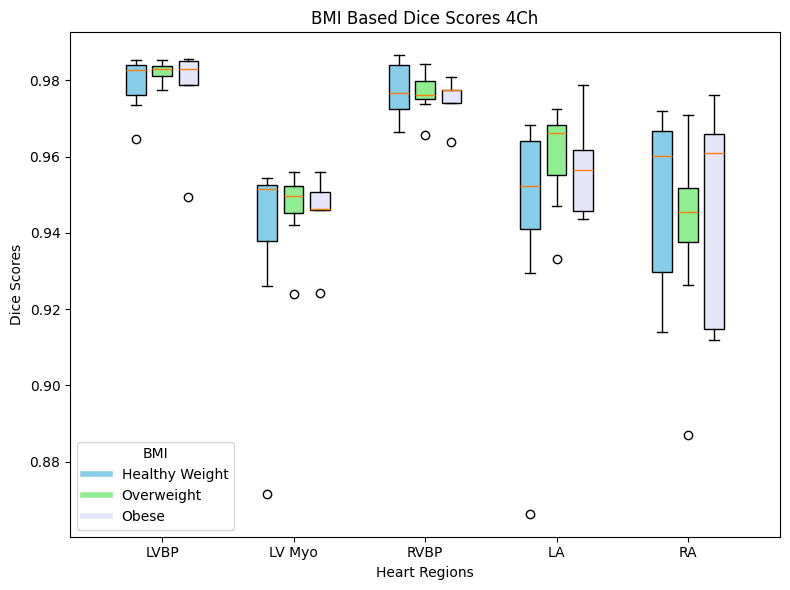

In [ ]:
locations = []
bp_data = []

group_width = 0.2

for i, group_x in enumerate(groups_x):
  for j, group_y in enumerate(groups_y):
    locations.append(i + j * group_width)
    bp_data.append(df.loc[df["BMI"] == group_y, group_x])


colours = ["skyblue", "lightgreen", "lavender"]

fig, grid = plt.subplots(figsize=(8,6))
boxplt = grid.boxplot(bp_data, positions=locations, widths = 0.15, patch_artist=True)

for i, patch in enumerate(boxplt["boxes"]):
  patch.set_facecolor(colours[i % len(groups_y)])

grid.set_xticks([i + group_width for i in range(len(groups_x))])
grid.set_xticklabels(groups_x)
grid.set_xlabel("Heart Regions")
grid.set_ylabel("Dice Scores")
grid.set_title("BMI Based Dice Scores 4Ch")

legends = [plt.Line2D([0], [0], color=colour, lw=4) for colour in colours]
grid.legend(legends, groups_y, title="BMI")

plt.tight_layout()
plt.show

In [ ]:
gt_dir_4ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Analyses/labels/labelsT4Ch - Weight/Obese"
pred_dir_4ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Analyses/preds/predsT4Ch - Weight/Obese"

gt_files_4ch = sorted([f for f in os.listdir(gt_dir_4ch) if f.endswith(".nii.gz")])
pred_files_4ch = sorted([f for f in os.listdir(pred_dir_4ch) if f.endswith(".nii.gz")])

dice_lvbp_dz = {}
dice_lvm_dz = {}
dice_rvbp_dz = {}
dice_la_dz = {}
dice_ra_dz = {}

dice_lvbp_list_dz = []
dice_lvm_list_dz = []
dice_rvbp_list_dz = []
dice_la_list_dz = []
dice_ra_list_dz = []

for gt_file, pred_file in zip(gt_files_4ch, pred_files_4ch):
  gt_path = os.path.join(gt_dir_4ch, gt_file)
  pred_path = os.path.join(pred_dir_4ch, pred_file)

  gt_seg = nib.load(gt_path).get_fdata()
  pred_seg = nib.load(pred_path).get_fdata()

  score_lvbp = []
  score_lvm = []
  score_rvbp = []
  score_la = []
  score_ra = []

  for i in range(25):
    gt_lvbp = gt_seg[:, :, i].copy()
    gt_lvbp[gt_lvbp != 1] = 0
    pred_lvbp = pred_seg[:, :, i].copy()
    pred_lvbp[pred_lvbp != 1] = 0
    score_lvbp.append(dice(gt_lvbp, pred_lvbp))

    gt_lvm = gt_seg[:, :, i].copy()
    gt_lvm[gt_lvm != 2] = 0
    gt_lvm[gt_lvm == 2] = 1
    #print(gt_lvm.shape)
    pred_lvm = pred_seg[:, :, i].copy()
    pred_lvm[pred_lvm != 2] = 0
    pred_lvm[pred_lvm == 2] = 1
    #print(pred_lvm.shape)
    score_lvm.append(dice(gt_lvm, pred_lvm))

    gt_rvbp = gt_seg[:, :, i].copy()
    gt_rvbp[gt_rvbp != 3] = 0
    gt_rvbp[gt_rvbp == 3] = 1
    pred_rvbp = pred_seg[:, :, i].copy()
    pred_rvbp[pred_rvbp != 3] = 0
    pred_rvbp[pred_rvbp == 3] = 1
    score_rvbp.append(dice(gt_rvbp, pred_rvbp))

    gt_la = gt_seg[:, :, i].copy()
    gt_la[gt_la != 4] = 0
    gt_la[gt_la == 4] = 1
    pred_la = pred_seg[:, :, i].copy()
    pred_la[pred_la != 4] = 0
    pred_la[pred_la == 4] = 1
    score_la.append(dice(gt_la, pred_la))

    gt_ra = gt_seg[:, :, i].copy()
    gt_ra[gt_ra != 5] = 0
    gt_ra[gt_ra == 5] = 1
    pred_ra = pred_seg[:, :, i].copy()
    pred_ra[pred_ra != 5] = 0
    pred_ra[pred_ra == 5] = 1
    score_ra.append(dice(gt_ra, pred_ra))

  dc_lvbp = round(np.mean(score_lvbp), 4)
  dc_lvm = round(np.mean(score_lvm), 4)
  dc_rvbp = round(np.mean(score_rvbp), 4)
  dc_la = round(np.mean(score_la), 4)
  dc_ra = round(np.mean(score_ra), 4)

  dice_lvbp_dz[gt_file] = dc_lvbp
  dice_lvm_dz[gt_file] = dc_lvm
  dice_rvbp_dz[gt_file] = dc_rvbp
  dice_la_dz[gt_file] = dc_la
  dice_ra_dz[gt_file] = dc_ra

  dice_lvbp_list_dz.append(dc_lvbp)
  dice_lvm_list_dz.append(dc_lvm)
  dice_rvbp_list_dz.append(dc_rvbp)
  dice_la_list_dz.append(dc_la)
  dice_ra_list_dz.append(dc_ra)

  print(gt_file)
  print(f"LVBP: {dc_lvbp}, LV Myo: {dc_lvm}, RVBP: {dc_rvbp}, LA: {dc_la}, RA: {dc_ra}")

In [ ]:
gt_dir_4ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Analyses/labels/labelsT4Ch - Weight/Obese"
pred_dir_4ch = "/content/drive/MyDrive/Colab Notebooks/Extended Individual project/Analyses/preds/predsT4Ch - Weight/Obese"

gt_files_4ch = sorted([f for f in os.listdir(gt_dir_4ch) if f.endswith(".nii.gz")])
pred_files_4ch = sorted([f for f in os.listdir(pred_dir_4ch) if f.endswith(".nii.gz")])

dice_lvbp_mz = {}
dice_lvm_mz = {}
dice_rvbp_mz = {}
dice_la_mz = {}
dice_ra_mz = {}

dice_lvbp_list_mz = []
dice_lvm_list_mz = []
dice_rvbp_list_mz = []
dice_la_list_mz = []
dice_ra_list_mz = []

for gt_file, pred_file in zip(gt_files_4ch, pred_files_4ch):
  gt_path = os.path.join(gt_dir_4ch, gt_file)
  pred_path = os.path.join(pred_dir_4ch, pred_file)

  gt_seg = nib.load(gt_path).get_fdata()
  pred_seg = nib.load(pred_path).get_fdata()

  score_lvbp = []
  score_lvm = []
  score_rvbp = []
  score_la = []
  score_ra = []

  for i in range(25):
    gt_lvbp = gt_seg[:, :, i].copy()
    gt_lvbp[gt_lvbp != 1] = 0
    pred_lvbp = pred_seg[:, :, i].copy()
    pred_lvbp[pred_lvbp != 1] = 0
    score_lvbp.append(dice(gt_lvbp, pred_lvbp))

    gt_lvm = gt_seg[:, :, i].copy()
    gt_lvm[gt_lvm != 2] = 0
    gt_lvm[gt_lvm == 2] = 1
    #print(gt_lvm.shape)
    pred_lvm = pred_seg[:, :, i].copy()
    pred_lvm[pred_lvm != 2] = 0
    pred_lvm[pred_lvm == 2] = 1
    #print(pred_lvm.shape)
    score_lvm.append(dice(gt_lvm, pred_lvm))

    gt_rvbp = gt_seg[:, :, i].copy()
    gt_rvbp[gt_rvbp != 3] = 0
    gt_rvbp[gt_rvbp == 3] = 1
    pred_rvbp = pred_seg[:, :, i].copy()
    pred_rvbp[pred_rvbp != 3] = 0
    pred_rvbp[pred_rvbp == 3] = 1
    score_rvbp.append(dice(gt_rvbp, pred_rvbp))

    gt_la = gt_seg[:, :, i].copy()
    gt_la[gt_la != 4] = 0
    gt_la[gt_la == 4] = 1
    pred_la = pred_seg[:, :, i].copy()
    pred_la[pred_la != 4] = 0
    pred_la[pred_la == 4] = 1
    score_la.append(dice(gt_la, pred_la))

    gt_ra = gt_seg[:, :, i].copy()
    gt_ra[gt_ra != 5] = 0
    gt_ra[gt_ra == 5] = 1
    pred_ra = pred_seg[:, :, i].copy()
    pred_ra[pred_ra != 5] = 0
    pred_ra[pred_ra == 5] = 1
    score_ra.append(dice(gt_ra, pred_ra))

  dc_lvbp = round(np.mean(score_lvbp), 4)
  dc_lvm = round(np.mean(score_lvm), 4)
  dc_rvbp = round(np.mean(score_rvbp), 4)
  dc_la = round(np.mean(score_la), 4)
  dc_ra = round(np.mean(score_ra), 4)

  dice_lvbp_dz[gt_file] = dc_lvbp
  dice_lvm_dz[gt_file] = dc_lvm
  dice_rvbp_dz[gt_file] = dc_rvbp
  dice_la_dz[gt_file] = dc_la
  dice_ra_dz[gt_file] = dc_ra

  dice_lvbp_list_dz.append(dc_lvbp)
  dice_lvm_list_dz.append(dc_lvm)
  dice_rvbp_list_dz.append(dc_rvbp)
  dice_la_list_dz.append(dc_la)
  dice_ra_list_dz.append(dc_ra)

  print(gt_file)
  print(f"LVBP: {dc_lvbp}, LV Myo: {dc_lvm}, RVBP: {dc_rvbp}, LA: {dc_la}, RA: {dc_ra}")

In [ ]:
dice_pd = []

groups_x = ["LVBP", "LV Myo", "RVBP", "LA", "RA"]
groups_y = ["Dizygotic", "Monozygotic"]
counter = 0

for group in groups_y:
  counter += 1
  if counter == 1:
    for n in range(0, len(d_10)):
      dice_pd.append({
        "BMI": group,
        "LVBP": d_1[n],
        "LV Myo": d_4[n],
        "RVBP": d_7[n],
        "LA": d_10[n],
        "RA": d_13[n]
      })
  elif counter == 2:
    for n in range(0, len(d_11)):
      dice_pd.append({
        "BMI": group,
        "LVBP": d_2[n],
        "LV Myo": d_5[n],
        "RVBP": d_8[n],
        "LA": d_11[n],
        "RA": d_14[n]
      })

df = pd.DataFrame(dice_pd)
print(df)


In [ ]:
locations = []
bp_data = []

group_width = 0.2

for i, group_x in enumerate(groups_x):
  for j, group_y in enumerate(groups_y):
    locations.append(i + j * group_width)
    bp_data.append(df.loc[df["BMI"] == group_y, group_x])


colours = ["skyblue", "lightgreen", "lavender"]

fig, grid = plt.subplots(figsize=(8,6))
boxplt = grid.boxplot(bp_data, positions=locations, widths = 0.15, patch_artist=True)

for i, patch in enumerate(boxplt["boxes"]):
  patch.set_facecolor(colours[i % len(groups_y)])

grid.set_xticks([i + group_width for i in range(len(groups_x))])
grid.set_xticklabels(groups_x)
grid.set_xlabel("Heart Regions")
grid.set_ylabel("Dice Scores")
grid.set_title("BMI Based Dice Scores 4Ch")

legends = [plt.Line2D([0], [0], color=colour, lw=4) for colour in colours]
grid.legend(legends, groups_y, title="BMI")

plt.tight_layout()
plt.show